In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
Lab_X_train = np.load('Lab_X_train.npy')
Lab_X_test = np.load('Lab_X_test.npy')
# Lab_X_val = np.load('Lab_X_val.npy')
Lab_Y_train = np.load('Lab_Y_train.npy')
Lab_Y_test = np.load('Lab_Y_test.npy')
# Lab_Y_val = np.load('Lab_Y_val.npy')

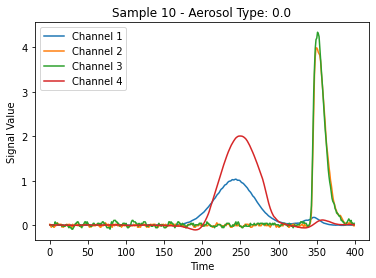

(140082, 400, 4)


In [4]:
# Get any random index out of all points
sample_index = 10

# Get the signal and label for the selected sample
signal = Lab_X_train[sample_index]
label = Lab_Y_train[sample_index]

# Plot the signals for each channel
# So basically for each aerosol we can see all 4 channels across the 400 time points (length of the signal)
# The y-axis is automatically scaled to represent the magnitude of detection
channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']
for channel_idx in range(signal.shape[1]):
    plt.plot(signal[:, channel_idx], label=channels[channel_idx])

plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('Sample {} - Aerosol Type: {}'.format(sample_index, label))

plt.legend()

plt.show()

print(Lab_X_train.shape)

In [10]:
print(Lab_X_train.shape)
print(Lab_X_test.shape)

print(Lab_Y_train.shape)
print(Lab_Y_test.shape)

(140082, 400, 4)
(70042, 400, 4)
(140082,)
(70042,)


In [8]:
Lab_X_train.reshape(140082,400*4).shape

(140082, 1600)

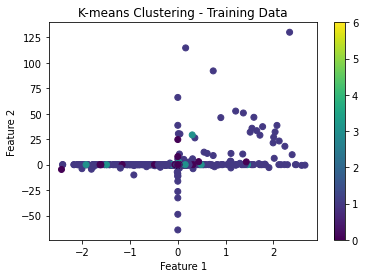

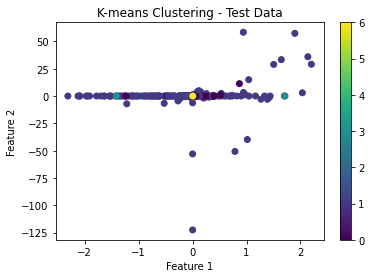

In [12]:
from sklearn.cluster import KMeans

# Reshape the training data to a 2D array
X_train = Lab_X_train.reshape(140082, 400 * 4)

# Make 7 clusters, because the labelling was on a scale from 0 - 6
num_clusters = 7

# Initialize the k-means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(X_train)

# Get the clustering labels to be used for the training data
train_cluster_labels = kmeans.labels_

# Perform clustering on both test and validation data and also visualize
X_test = Lab_X_test.reshape(70042, 400 * 4)
test_cluster_labels = kmeans.predict(X_test)


plt.scatter(X_train[:, 0], X_train[:, 1], c=train_cluster_labels, cmap='viridis')
plt.title('K-means Clustering - Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=test_cluster_labels, cmap='viridis')
plt.title('K-means Clustering - Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

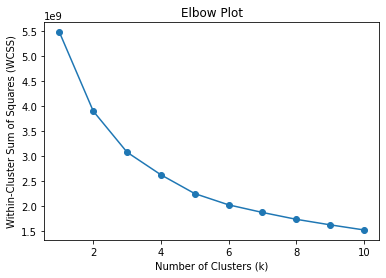

In [20]:
# Reshape the training data to 2D
X_train_2d = Lab_X_train.reshape(Lab_X_train.shape[0], -1)

# Define a range of k values
k_values = range(1, 11)

# Calculate the within-cluster sum of squares (WCSS) for each k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_2d)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Plot')
plt.show()
